In [1]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from glob import glob
import os

import pandas as pd
from scipy import ndimage, spatial
from importlib import reload

import utils

In [8]:
src = '..' + os.sep + 'proc' + os.sep
lsrc = src + 'leyre' + os.sep
msrc = src + 'mather' + os.sep
dst = '..' + os.sep + 'proc' + os.sep
lgenes = [ text.split(os.sep)[-1] for text in sorted(glob(lsrc + '*')) ]
mgenes = [ text.split(os.sep)[-1] for text in sorted(glob(msrc + '*')) ]

In [9]:
print(lgenes, mgenes)

['LBD37'] ['p53']


In [13]:
lgidx, mgidx = 0,0
print('Comparing gene', lgenes[lgidx], 'with reference', mgenes[mgidx] )
gdst = dst + lsrc.split(os.sep)[-2] + os.sep + genes[mgidx] + os.sep
print('Will save all results in ',gdst)

Comparing gene LBD37 with reference p53
Will save all results in  ../proc/leyre/LBD37/


In [ ]:
platenum = 1
mcolor = 

In [221]:
from skimage import exposure

pidx = 4
bname = os.path.split(os.path.splitext(platefiles[pidx])[0])[1]
reference = np.loadtxt(mplatefiles[pidx], delimiter=',')
plate = np.loadtxt(lplatefiles[pidx], delimiter=',')
nrows, ncols = plate.shape

pnonzeros = plate != 0
matched = exposure.match_histograms(plate, reference, channel_axis=None)

diff = reference - matched
vlim = np.max( [ np.abs(np.min(diff)), np.max(diff) ] )

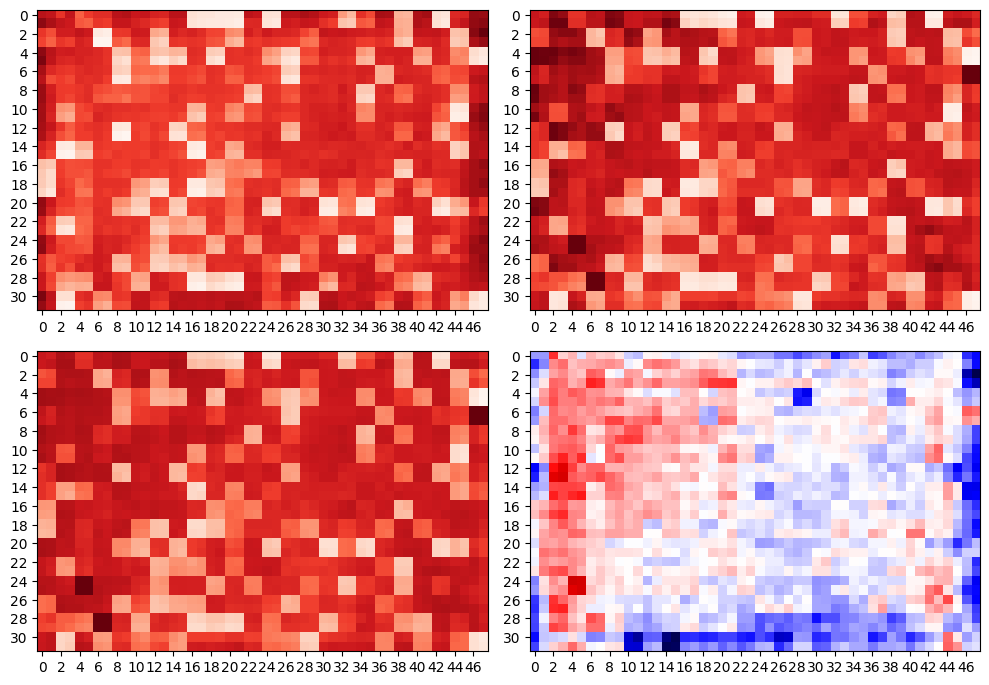

In [222]:
fig, ax = plt.subplots(2,2, figsize=(10,7), sharex=False, sharey=False)
ax = np.atleast_1d(ax).ravel(); i = 0

ax[0].imshow(reference, cmap='Reds_r')
ax[1].imshow(matched, cmap='Reds_r')
ax[2].imshow(plate, cmap='Reds_r')
ax[3].imshow(diff, cmap='seismic', vmin=-vlim, vmax=vlim)

for i in range(len(ax)):
    ax[i].set_xticks(range(0,ncols,2), range(0,ncols,2))
    ax[i].set_yticks(range(0,nrows,2), range(0,nrows,2));
    ax[i].set_aspect('equal')

fig.tight_layout()

In [241]:
diff = reference - matched
dhist, b = np.histogram(diff[pnonzeros], bins=np.linspace(-vlim-1, vlim+1, 101), density=True)
xvals = b[:-1]

In [242]:
mu, sigma = np.mean(diff), np.std(diff)
normal = 1/(np.std(diff) * np.sqrt(2 * np.pi))*np.exp( - (xvals - np.mean(diff))**2 / (2 * np.std(diff)**2))
print(mu, sigma, vlim)

-0.3550484008978696 18.631070516747734 96.57142857142856


In [259]:
mu, sigma = 0, np.std(diff)/np.sqrt(2)
laplace = np.exp(-abs(xvals-mu)/sigma)/(2.*sigma)
print(mu, sigma, vlim)

0 13.174156303157076 96.57142857142856


In [260]:
alpha = 0.01
sigma * np.log(2*alpha)

-51.5376025350567

In [255]:
lcdf = np.zeros(len(xvals))
lcdf[xvals < 0] = 0.5*np.exp((xvals[xvals < 0] - mu)/sigma)
lcdf[xvals >= 0] = 1-0.5*np.exp(-(xvals[xvals >= 0] - mu)/sigma)

In [229]:
mu, sigma = np.mean(diff), np.sqrt(3)*np.std(diff)/np.pi
logistic = np.exp((mu-b[:-1])/sigma)/(sigma*(1+np.exp((mu-b[:-1])/sigma))**2)

In [230]:
rhist, bins = np.histogram(reference, bins=range(1,257))
phist, _ = np.histogram(plate, bins=bins)
mhist, _ = np.histogram(matched, bins=bins)

In [231]:
imgsize = plate.size - np.sum(pzeros)
rcumsum = np.cumsum(rhist)/reference.size
pcumsum = np.cumsum(phist)/imgsize
mcumsum = np.cumsum(mhist)/imgsize

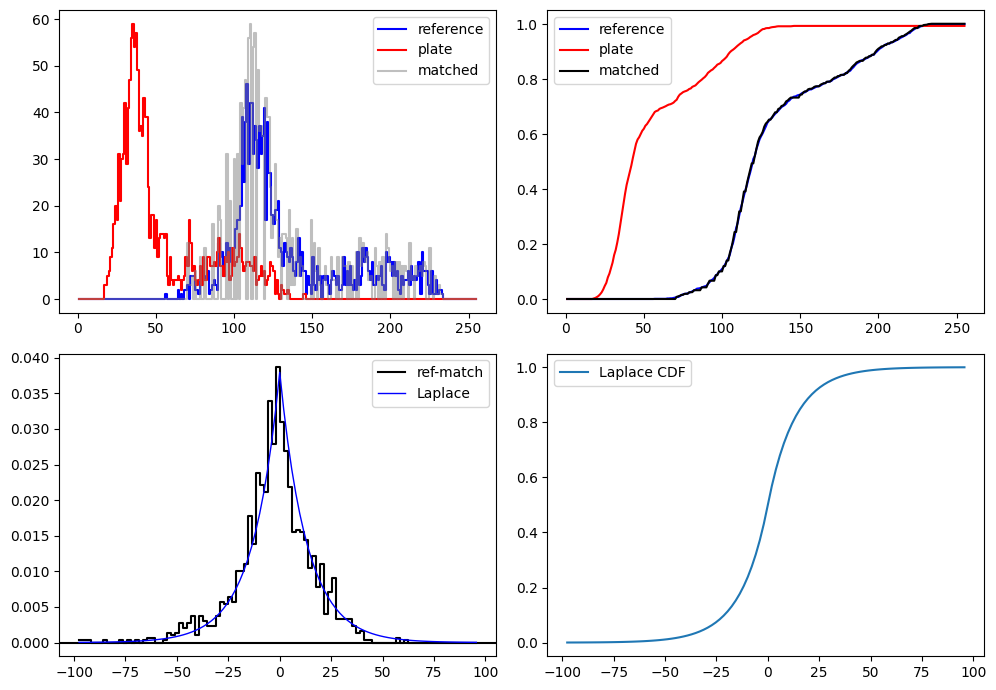

In [256]:
fig, ax = plt.subplots(2,2, figsize=(10,7), sharex=False, sharey=False)
ax = np.atleast_1d(ax).ravel(); i = 0

ax[i].plot(bins[:-1], rhist, c='blue', ds='steps', label='reference')
ax[i].plot(bins[:-1], phist, c='red', ds='steps', label='plate')
ax[i].plot(bins[:-1], mhist, c='gray', ds='steps', alpha=0.5, label='matched')

i+=1
ax[i].plot(bins[:-1], rcumsum, c='blue', label='reference')
ax[i].plot(bins[:-1], pcumsum, c='red', label='plate')
ax[i].plot(bins[:-1], mcumsum, c='k', label='matched')

i+=1
ax[i].axhline(0, c='k')
#ax[i].scatter(xvals, diff.ravel(), alpha=0.3, c='gray', label='ref-match')
#ax[i].set_ylim((-vlim-5, vlim+5))
ax[i].plot(xvals, dhist, c='k', ds='steps', label='ref-match')
#ax[i].plot(b[:-1], normal, c='red' )
ax[i].plot(xvals, laplace, c='blue', lw=1, label='Laplace' )
#ax[i].plot(b[:-1], logistic, c='green' )

i+=1
ax[i].plot(xvals, lcdf, label='Laplace CDF')

for i in range(len(ax)):
    ax[i].legend();

fig.tight_layout()

In [258]:
alpha = 0.01


(array([77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93,
        94, 95, 96, 97, 98, 99]),)